Q1

In [7]:
import pandas as pd
import folium
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import haversine_distances
from sklearn.metrics import pairwise_distances

# Carregar os dados de crimes
data = pd.read_csv("CrimeMaio.csv")

# Selecionar atributos de latitude e longitude
coords = data[['LATITUDE', 'LONGITUDE']]

# Calcular a matriz de distâncias usando a distância de haversine
distance_matrix = haversine_distances(coords.values)

# Definir a métrica como a distância máxima entre os pontos
eps = distance_matrix.mean()

# Criar o modelo DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=5, metric='precomputed')

# Ajustar o modelo aos dados
dbscan.fit(distance_matrix)

# Obter os rótulos dos clusters
labels = dbscan.labels_

# Adicionar as coordenadas dos pontos ao dataframe original
data['CLUSTER'] = labels

# Criar um mapa com as coordenadas dos crimes agrupados por cluster
map_crime_clusters = folium.Map(location=[data['LATITUDE'].mean(), data['LONGITUDE'].mean()], zoom_start=12)

# Adicionar marcadores no mapa para cada ponto de crime com cor de acordo com o cluster
for _, row in data.iterrows():
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=3,
        color='blue' if row['CLUSTER'] == -1 else 'red',
        fill=True,
        fill_color='blue' if row['CLUSTER'] == -1 else 'red'
    ).add_to(map_crime_clusters)

# Exibir o mapa
map_crime_clusters


Q2

In [6]:
from sklearn.cluster import KMeans

# Obter o número de clusters encontrado pelo DBSCAN
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Criar o modelo K-Means com o número de clusters obtido do DBSCAN
kmeans = KMeans(n_clusters=n_clusters)

# Ajustar o modelo aos dados
kmeans.fit(coords)

# Obter os rótulos dos clusters
kmeans_labels = kmeans.labels_

# Adicionar os rótulos do K-Means ao dataframe original
data['KMeans Cluster'] = kmeans_labels

# Criar um mapa com as coordenadas dos crimes agrupados por cluster no K-Means
map_kmeans_clusters = folium.Map(location=[data['LATITUDE'].mean(), data['LONGITUDE'].mean()], zoom_start=12)

# Adicionar marcadores no mapa para cada ponto de crime com cor de acordo com o cluster do K-Means
for _, row in data.iterrows():
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=3,
        color='blue' if row['KMeans Cluster'] == -1 else 'green',
        fill=True,
        fill_color='blue' if row['KMeans Cluster'] == -1 else 'green'
    ).add_to(map_kmeans_clusters)

# Exibir o mapa
map_kmeans_clusters


c:\Users\Guilhermepc\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Q3

C:\Users\Guilhermepc\AppData\Local\Temp\ipykernel_10680\3094041919.py:8: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix_euclidean, method='ward')


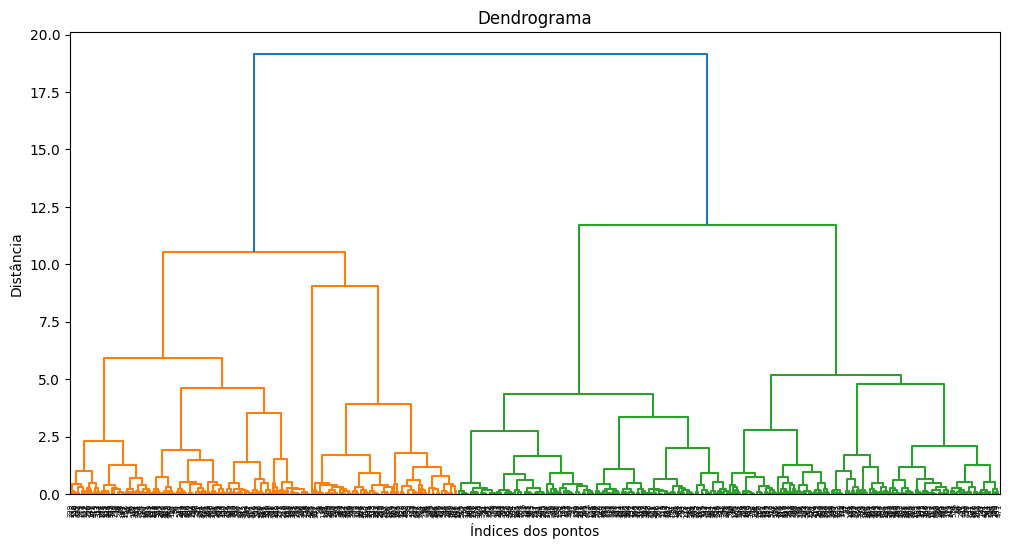

In [8]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Criar a matriz de distâncias usando a métrica euclidiana
distance_matrix_euclidean = pairwise_distances(coords.values)

# Calcular a matriz de ligação hierárquica usando o método Ward
linkage_matrix = linkage(distance_matrix_euclidean, method='ward')

# Plotar o dendrograma
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Dendrograma')
plt.xlabel('Índices dos pontos')
plt.ylabel('Distância')
plt.show()
